In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Cost_of_Living_Index_by_Country_2024.csv')
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [ ]:
# Assuming 'Rank' is your target variable and the rest are features
X = df.drop('Rank', axis=1)  # Replace 'Rank' with the actual name of your target variable column
X.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [ ]:
# Assuming 'Rank' is your target variable
y = df['Rank']  # Replace 'Rank' with the actual name of your target variable column
y = pd.get_dummies(y)
y.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming X contains categorical features
encoder = OneHotEncoder(handle_unknown='ignore')  # Handles new categories in test data
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)  # Use the same encoder for consistency

# Now fit the model with the encoded data
dt.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

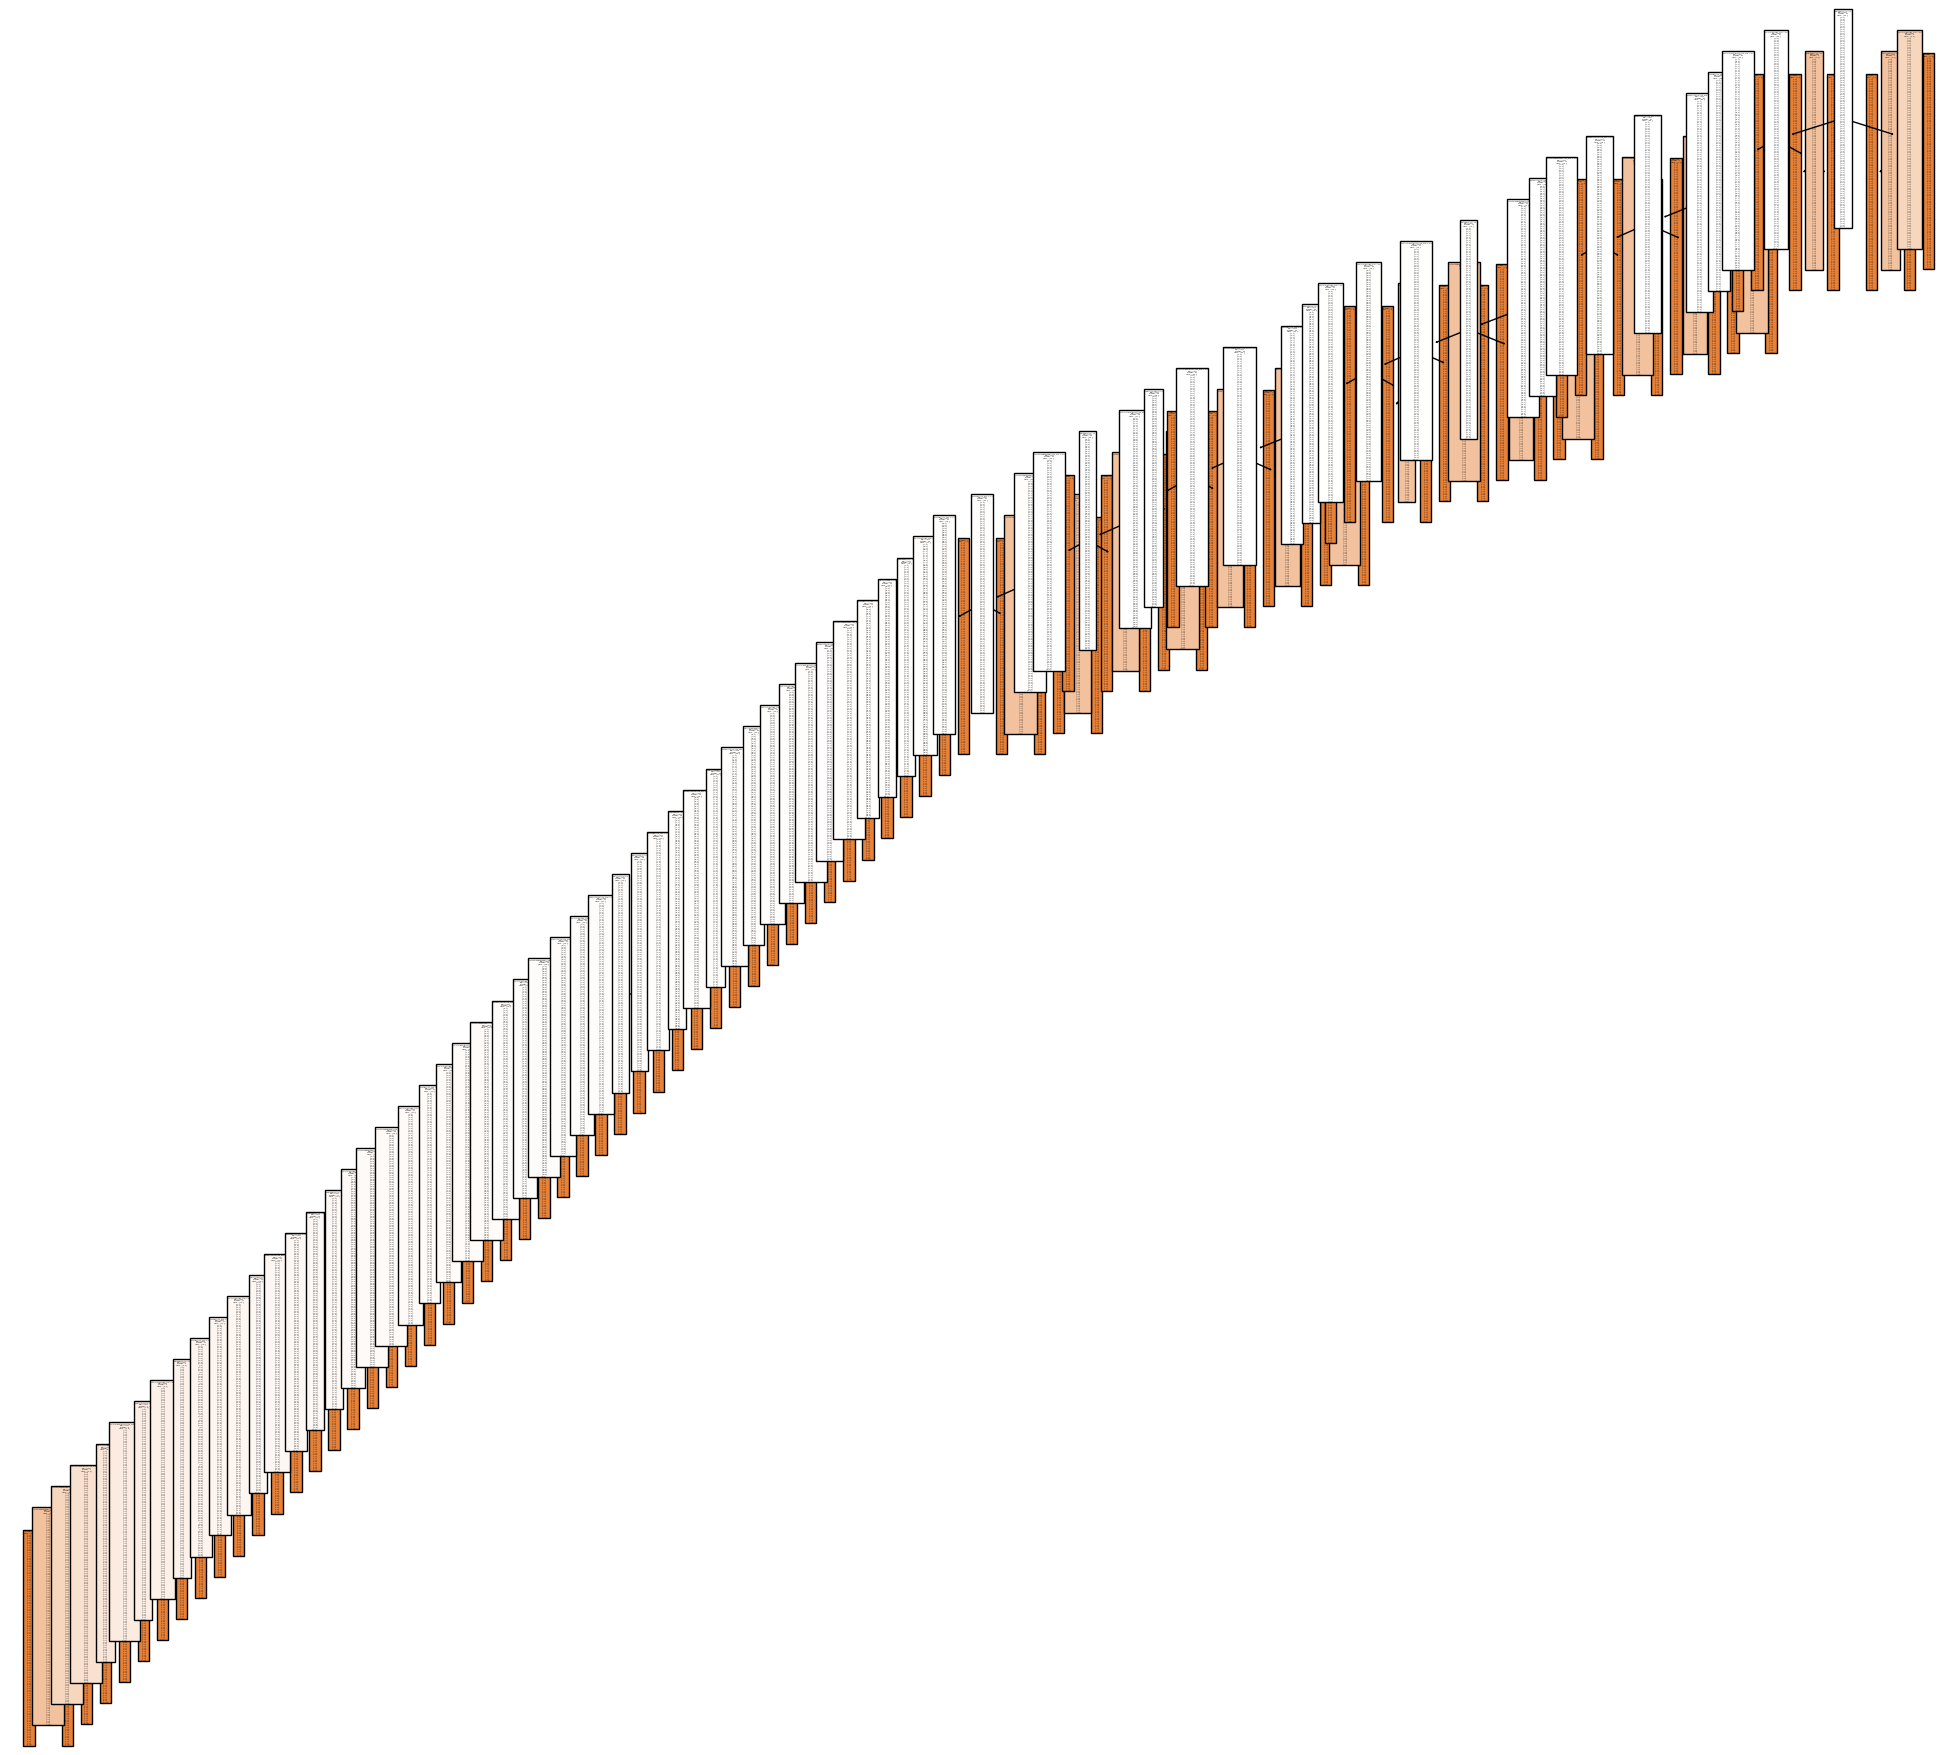

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))

# Get feature names from the encoder
feature_names_encoded = encoder.get_feature_names_out(X.columns)

# Replace with the actual target names from your dataset
class_names = y.columns
_ = tree.plot_tree(dt,
                   feature_names=feature_names_encoded,  # Use encoded feature names
                   class_names=class_names,
                   filled=True)

In [ ]:
# Transform the X_test data using the fitted encoder
X_test_encoded = encoder.transform(X_test)

# Now predict using the encoded test data
red = dt.predict(X_test_encoded)

In [ ]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(red).argmax(axis=1)  # Use 'red' which holds the predictions
confusion_matrix(species, predictions)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])